In [19]:
using Pkg; Pkg.activate(".")
using Statistics
using MUST
using PyPlot
using Glob

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/visualize/Project.toml`


In [20]:
MUST.@import_dispatch "../../../dispatch2";
MUST.@get_help visual

In [21]:
folder            = MUST.@in_dispatch "data/grid2_phase2"
content_of_folder = glob("*/", folder)
snapshots         = sort(MUST.list_of_snapshots(content_of_folder));

In [22]:
function convert_snaps(snapshots, folder)
    boxes = []
    for (i_s,snap) in enumerate(snapshots)
        try
            # The dispatch snapshot object (Python)
            snap = dispatch.snapshot(snapshots[i_s], data=folder)

            # Convert its content to pure Julia
            s = MUST.Space(snap, :d, :ee, :uz, :e)
            
            # Units for conversion to CGS
            #units = MUST.StaggerCGS(snap)

            # Apply the conversion
            #MUST.convert!(s, units; d=:d,   ee=:ee, uz=:u,  e=:e, 
            #                        x=:l,   y=:l,   z=:l)
            
            # Also save the snapshot as Box (a regular gridded 3D-cube) to save time later
            b_s = MUST.Box(s)

            append!(boxes, [b_s])

            # Write to HDF5 file. Can easily be read as a Memory map later with the build in functions
            MUST.save(s;   name="space_sn$(snapshots[i_s])", folder=folder)
            MUST.save(b_s; name="box_sn$(snapshots[i_s])",   folder=folder)
        catch
            @warn "sn $(i_s) could not be read."
        end
    end

    boxes
end

convert_snaps (generic function with 1 method)

In [23]:
function read_snaps(snapshots, folder)
    boxes = []
    for (i_s,snap) in enumerate(snapshots)
        try
            # Also save the snapshot as Box (a regular gridded 3D-cube) to save time later
            append!(boxes, [MUST.Box("box_sn$(snapshots[i_s])", folder=folder)])
        catch
            @warn "could not load $(i_s)"
        end
    end
    boxes
end

read_snaps (generic function with 1 method)

In [24]:
boxes = convert_snaps(snapshots, folder)
z     = boxes[1].z[1,1,:];
@show z[1] z[end]

directory /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid2_phase2/00000/ has no snapshot.nml file
directory /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid2_phase2/00004/ has no snapshot.nml file


┌ Warning: sn 1 could not be read.
└ @ Main In[22]:27
┌ Warning: sn 2 could not be read.
└ @ Main In[22]:27


directory /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid2_phase2/00011/ has no snapshot.nml file

timer:
          patch metadata:   0.122 sec
                read-aux:  60.141 sec

timer:
          patch metadata:   6.351 sec
                read-aux:  11.183 sec
directory /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid2_phase2/00049/ has no snapshot.nml file


┌ Warning: sn 9 could not be read.
└ @ Main In[22]:27
┌ Warning: sn 31 could not be read.
└ @ Main In[22]:27


z[1] = -1.975f0
z[end] = 0.975f0


0.975f0

In [25]:
f,ax = plt.subplots(2,1,sharex=true, sharey=true, figsize=(5,7))

b1  = MUST.reduce_by_value(mean, boxes[50], z=z[end])
im1 = ax[1].imshow(b1[:uz][:,:,1], cmap="hot")
plt.colorbar(im1,ax=ax[1])

b2  = MUST.reduce_by_value(mean, boxes[end], z=z[1])
im2 = ax[2].imshow(b2[:uz][:,:,1], cmap="hot")
plt.colorbar(im2, ax=ax[2])

LoadError: BoundsError: attempt to access 27-element Vector{Any} at index [50]

In [ ]:
#gif_by_value(mean, folder, "z 0 surface", variable=:ee, duration=0.35, z=0.0,   path_ext="zp00", cmap="hot")
#gif_by_value(mean, folder, "top",         variable=:uz, duration=0.35, z=0.5,   path_ext="zp05", cmap="hot", vmin=-1,  vmax=1)
#gif_by_value(mean, folder, "inter",       variable=:ee, duration=0.35, z=0.125, path_ext="zp13", cmap="hot", vmin=5.15, vmax=5.55)
#gif_by_value(mean, folder, "bottom",      variable=:ee, duration=0.35, z=-2.5,  path_ext="zm25", cmap="hot")

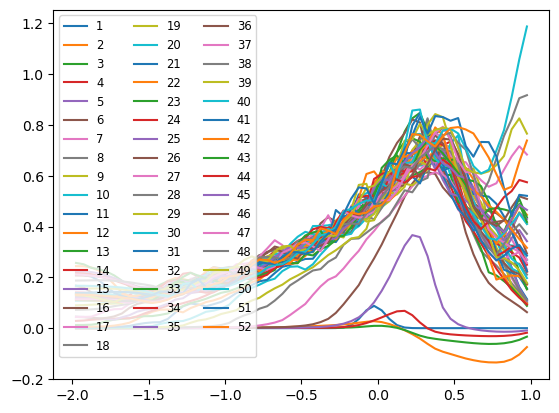

PyObject <matplotlib.legend.Legend object at 0x2b2636198940>

In [ ]:
f,ax = plt.subplots(1,1)

for i in 1:length(boxes)
    v  = MUST.plane_statistic(maximum, boxes[i], :uz)
    zs = boxes[i].z[1,1,:]

    plt.plot(zs, v, label="$(i)")
end

plt.legend(ncol=3, fontsize="small", loc="upper left")

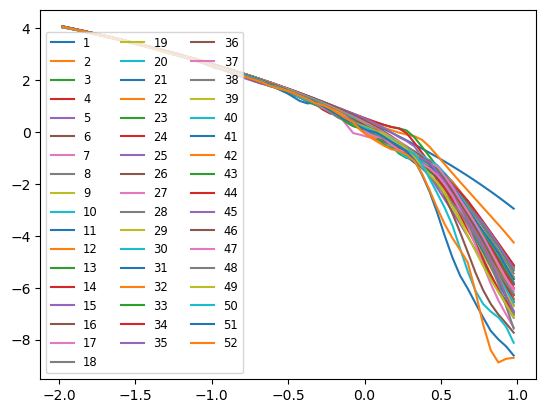

PyObject <matplotlib.legend.Legend object at 0x2b263a601e20>

In [ ]:
f,ax = plt.subplots(1,1)

for i in 1:length(boxes)
    v  = MUST.plane_statistic(x->minimum(log.(x)), boxes[i], :d)
    zs = boxes[i].z[1,1,:]

    plt.plot(zs, v, label="$(i)")
end

plt.legend(ncol=3, fontsize="small")

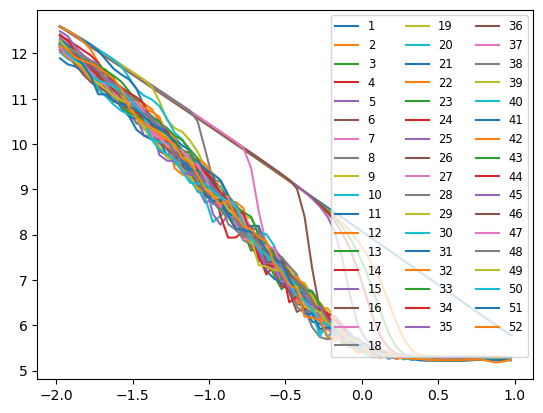

PyObject <matplotlib.legend.Legend object at 0x2b2636bccd30>

In [ ]:
f,ax = plt.subplots(1,1)

for i in 1:length(boxes)
    v  = MUST.plane_statistic(minimum, boxes[i], :ee)
    zs = boxes[i].z[1,1,:]

    plt.plot(zs, v, label="$(i)")
end

plt.legend(ncol=3, fontsize="small")